<a href="https://colab.research.google.com/github/NamanANamanA/Research2022/blob/main/extract_colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easydev                 #version 0.12.0
!pip install colormap                #version 1.0.4
!pip install opencv-python           #version 4.5.5.64
!pip install colorgram.py            #version 1.2.0
!pip install extcolors               #version 1.0.0

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image

import cv2
import extcolors
from colormap import rgb2hex

In [60]:
def rgb_to_cmyk(r, g, b, CMYK_SCALE=100, RGB_SCALE = 255):
    if (r, g, b) == (0, 0, 0):
        return 0, 0, 0, CMYK_SCALE
    c = 1 - r / RGB_SCALE
    m = 1 - g / RGB_SCALE
    y = 1 - b / RGB_SCALE
    min_cmy = min(c, m, y)
    c = (c - min_cmy) / (1 - min_cmy)
    m = (m - min_cmy) / (1 - min_cmy)
    y = (y - min_cmy) / (1 - min_cmy)
    k = min_cmy
    return c * CMYK_SCALE, m * CMYK_SCALE, y * CMYK_SCALE, k * CMYK_SCALE

In [59]:
def return_colors(img_path, tolerance):
  
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  blur_img = cv2.blur(img, (10,10))
  im_pil = Image.fromarray(blur_img)
  colors_x = extcolors.extract_from_image(im_pil, tolerance = tolerance, limit = 13)

  colors = []
  for item in colors_x[0]:
    if (item[1] / colors_x[1]) < .5 and (item[1] / colors_x[1]) > .01:
      colors.append(item[0])

  return colors

In [61]:
def vis_palette(colors):
  fig, ax = plt.subplots(figsize=(192,108),dpi=10)
  fig.set_facecolor('white')
  plt.savefig('bg.png')
  plt.close(fig)

  bg = plt.imread('bg.png')
  fig = plt.figure(figsize=(90, 90), dpi = 10)
  ax = fig.add_subplot(1,1,1)

  x_posi, y_posi, y_posi2 = 320, 25, 25

  for idx, c in enumerate(colors):
      red, green, blue = c
      c, m, y, k = rgb_to_cmyk(red, green, blue)
      c, m, y, k = round(c), round(m), round(y), round(k)
      if idx <= 5:
          y_posi += 125
          rect = patches.Rectangle((x_posi, y_posi), 290, 115, color = (red/255, green/255, blue/255))
          ax.add_patch(rect)
          text = '(' + str(red) + ', ' + str(green) + ', ' + str(blue) + '), (' + str(c) + ', ' + str(m) + ', ' + str(y) + ', ' + str(k) + ')'
          ax.text(x = x_posi+360, y = y_posi+80, s = text, fontdict={'fontsize': 100})
      else:
          y_posi2 += 125
          rect = patches.Rectangle((x_posi + 850, y_posi2), 290, 115, color = (red/255, green/255, blue/255))
          ax.add_artist(rect)
          text = '(' + str(red) + ', ' + str(green) + ', ' + str(blue) + '), (' + str(c) + ', ' + str(m) + ', ' + str(y) + ', ' + str(k) + ')'
          ax.text(x = x_posi+1210, y = y_posi2+80, s = text, fontdict={'fontsize': 100})
          
  ax.axis('off')
  plt.imshow(bg)
  plt.tight_layout()

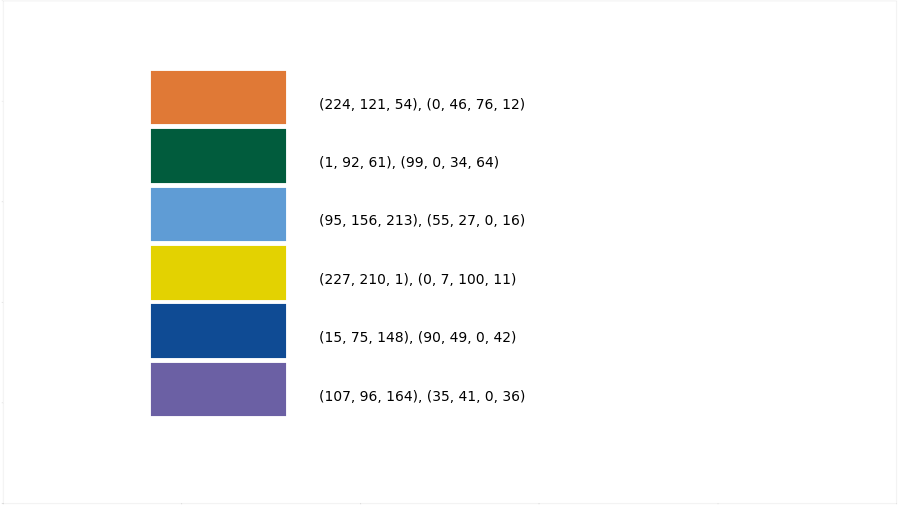

In [62]:
colors = return_colors('/content/image.jpeg', 15)
vis_palette(colors)